In [21]:
# 08 outlier data
import pandas as pd
import numpy as np

# 랜덤 시드 고정
# 랜덤 시드 : 난수(랜덤 수)생성기에서 경우의 고정시킬 때 사용
np.random.seed(0)

num_samples = 1000


data = {
    "수입": np.random.normal(loc=4000, scale=1000, size=num_samples),
    "지출": np.random.normal(loc=2000, scale=500, size=num_samples),
}

df = pd.DataFrame(data)

# 이상치 추가
num_outliers = 100

# 수입 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "수입"] = (
    df["수입"].mean() + 5 * df["수입"].std()
)
# 지출 열에 대한 이상치 추가
df.loc[np.random.choice(df.index, num_outliers), "지출"] = (
    df["지출"].mean() + 5 * df["지출"].std()
)



In [22]:
df.head()

,수입,지출
0,5764.052346,2277.981340
1,4400.157208,2446.236944
2,4978.737984,1788.842588
3,6240.893199,2052.357015
4,5867.557990,2114.026663


In [23]:
# 어떤 열에 대한 이상치를 탐색
column = "수입"

# 사분위수 확인
# 하위 25% 경계값, Q1 1사분면
Q1 = df[column].quantile(0.25)
# 하위 75% 경계값, Q3 3사분면
Q3 = df[column].quantile(0.75)

# IQR : Q3 ~ Q1 사이에 범위값
IQR = Q3 - Q1

# 하한과 상한 계산
lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

print(df[column].median())
print(lower_bound, upper_bound)
# 하한과 상한의 역할
# 조건식에서 비교 값
# 조건식(condition) = 비교열, 비교연산자, 비교 값

# 하한(lower_bound) 보다 작은 값을 탐색
lower_condition = df[column] < lower_bound

# 상한(upper_bound) 보다 큰 값을 탐색
upper_condition = df[column] > upper_bound

# 이상치란, 하한보다 작거나 | 상한보다 크거나
df.loc[lower_condition | upper_condition, column]

4051.760169283014
997.309470498351 7252.939470868489


24     8892.378521
28     8892.378521
30     8892.378521
34     8892.378521
38     8892.378521
          ...     
935    8892.378521
944    8892.378521
946    8892.378521
952    8892.378521
984    8892.378521
Name: 수입, Length: 99, dtype: float64

In [24]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Axes: >

C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.

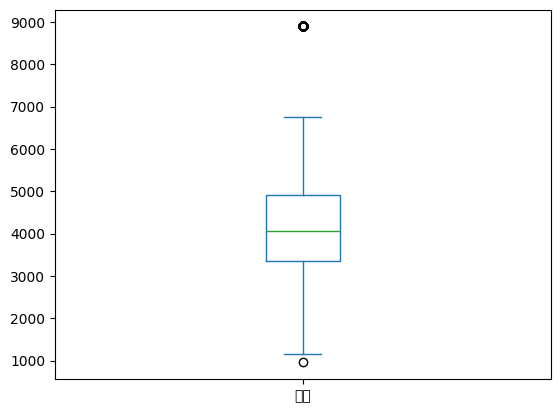

In [25]:
# 수입에 대한 상자그림
df["수입"].plot.box()

<Axes: xlabel='수입', ylabel='지출'>

C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 5

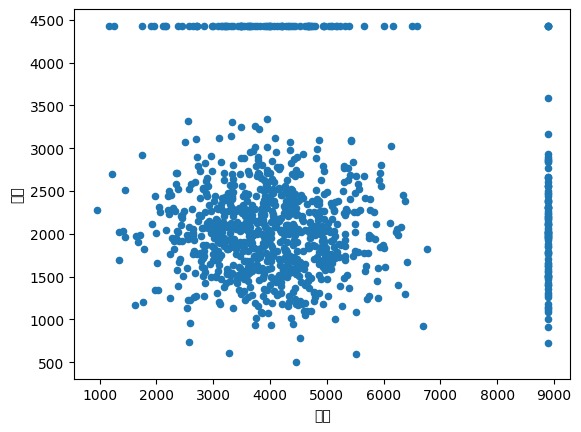

In [26]:
# 수입와 지출 간의 산점도
df.plot.scatter(x="수입", y="지출")

In [27]:
import pandas as pd
import numpy as np

np.random.seed(0)

# 총 데이터 수
num_students = 10000

df = pd.DataFrame(
    {
        "나이": np.random.randint(20, 30, size=num_students),
        "학년": np.random.randint(1, 5, size=num_students),
        "학점": np.round(np.random.uniform(0, 5.0, size=num_students), 2),
    }
)

# 이상치 추가 수
num_outliers = 500

# 학점 열에 이상치 추가
outlier_indices_gpa = np.random.choice(df.index, num_outliers, replace=False)

df.loc[outlier_indices_gpa, "학점"] = np.round(
    np.random.uniform(0.0, 10.0, size=num_outliers), 2
)

In [31]:
# 이상치 탐색 열 (column)
column = '학점'

# Q1, Q3 추출
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

IQR = Q3 - Q1

# 하한(lower_bound) 상한(upper_bound)
lower_bound = Q1 - IQR * 1.5
upper_bound = Q3 + IQR * 1.5

# 하한을 벗어난 데이터 탐색 조건식
lower_condition = df[column] < lower_bound
# 상한을 벗어난 데이터 탐색 조건식
upper_condition = df[column] > upper_bound

# 이상치 선택 후
# 평균 값으로 이상치 대체
df.loc[lower_condition | upper_condition] = df[column].mean()

In [32]:
# 이상치 대체 후 확인하는 작업

# 학점이 4.5보다 크거나
# 학점이 1.0보다 작거나나
condition1 = df[column] > 4.5
condition2 = df[column] < 1.0

df.loc[condition1 | condition2 ]

,나이,학년,학점
2,23.0,2.0,6.37
4,27.0,2.0,0.75
7,25.0,2.0,0.05
9,24.0,4.0,0.49
17,27.0,3.0,0.80
...,...,...,...
9985,21.0,1.0,4.85
9987,26.0,2.0,4.90
9993,24.0,3.0,0.29
9995,22.0,4.0,4.56
